In [1]:
import pickle

from sklearn.cluster import AgglomerativeClustering

import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from sklearn import metrics

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
with open('..\\data\\processed\\X_scaled.pickle', 'rb') as f:
        X = pickle.load(f)

In [3]:
clustering = AgglomerativeClustering(n_clusters=2,
                                     affinity='euclidean', 
                                     memory=None, 
                                     connectivity=None, 
                                     compute_full_tree='auto', 
                                     linkage='ward', 
                                     distance_threshold=None).fit(X)
labels = clustering.labels_

# Дендрограмма

In [4]:
N = len(pd.unique(pd.Series(labels)))

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

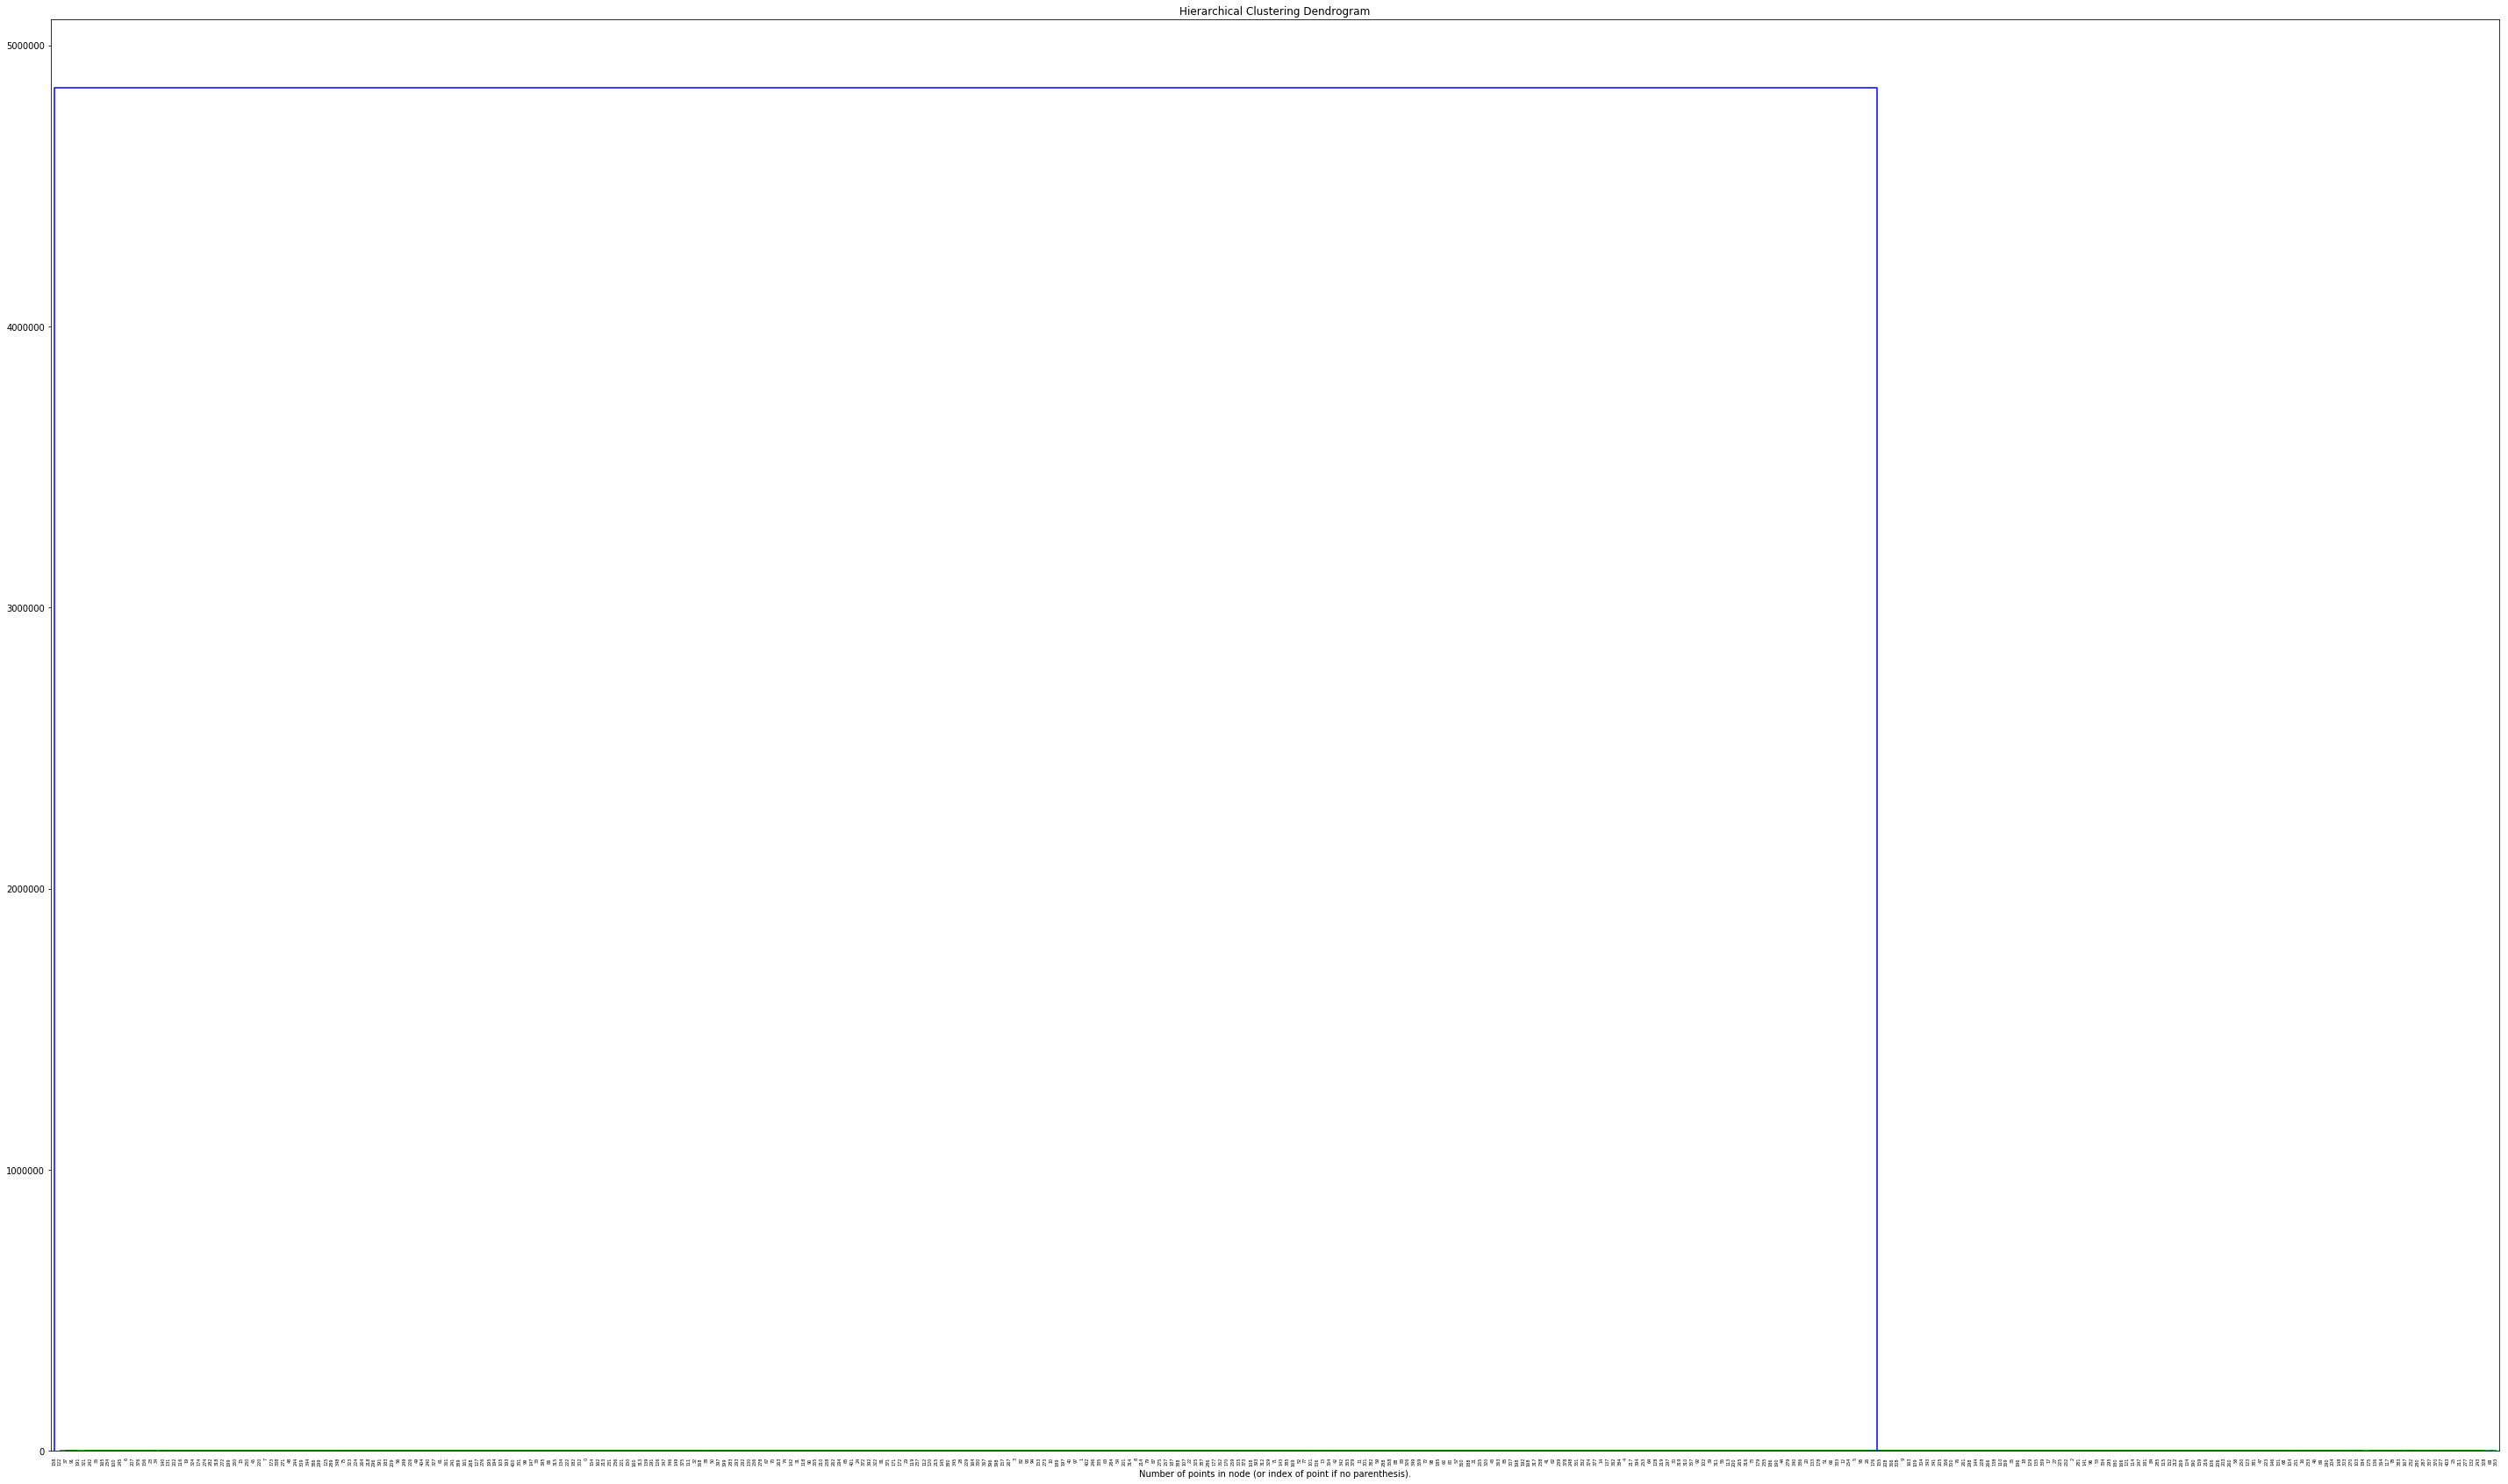

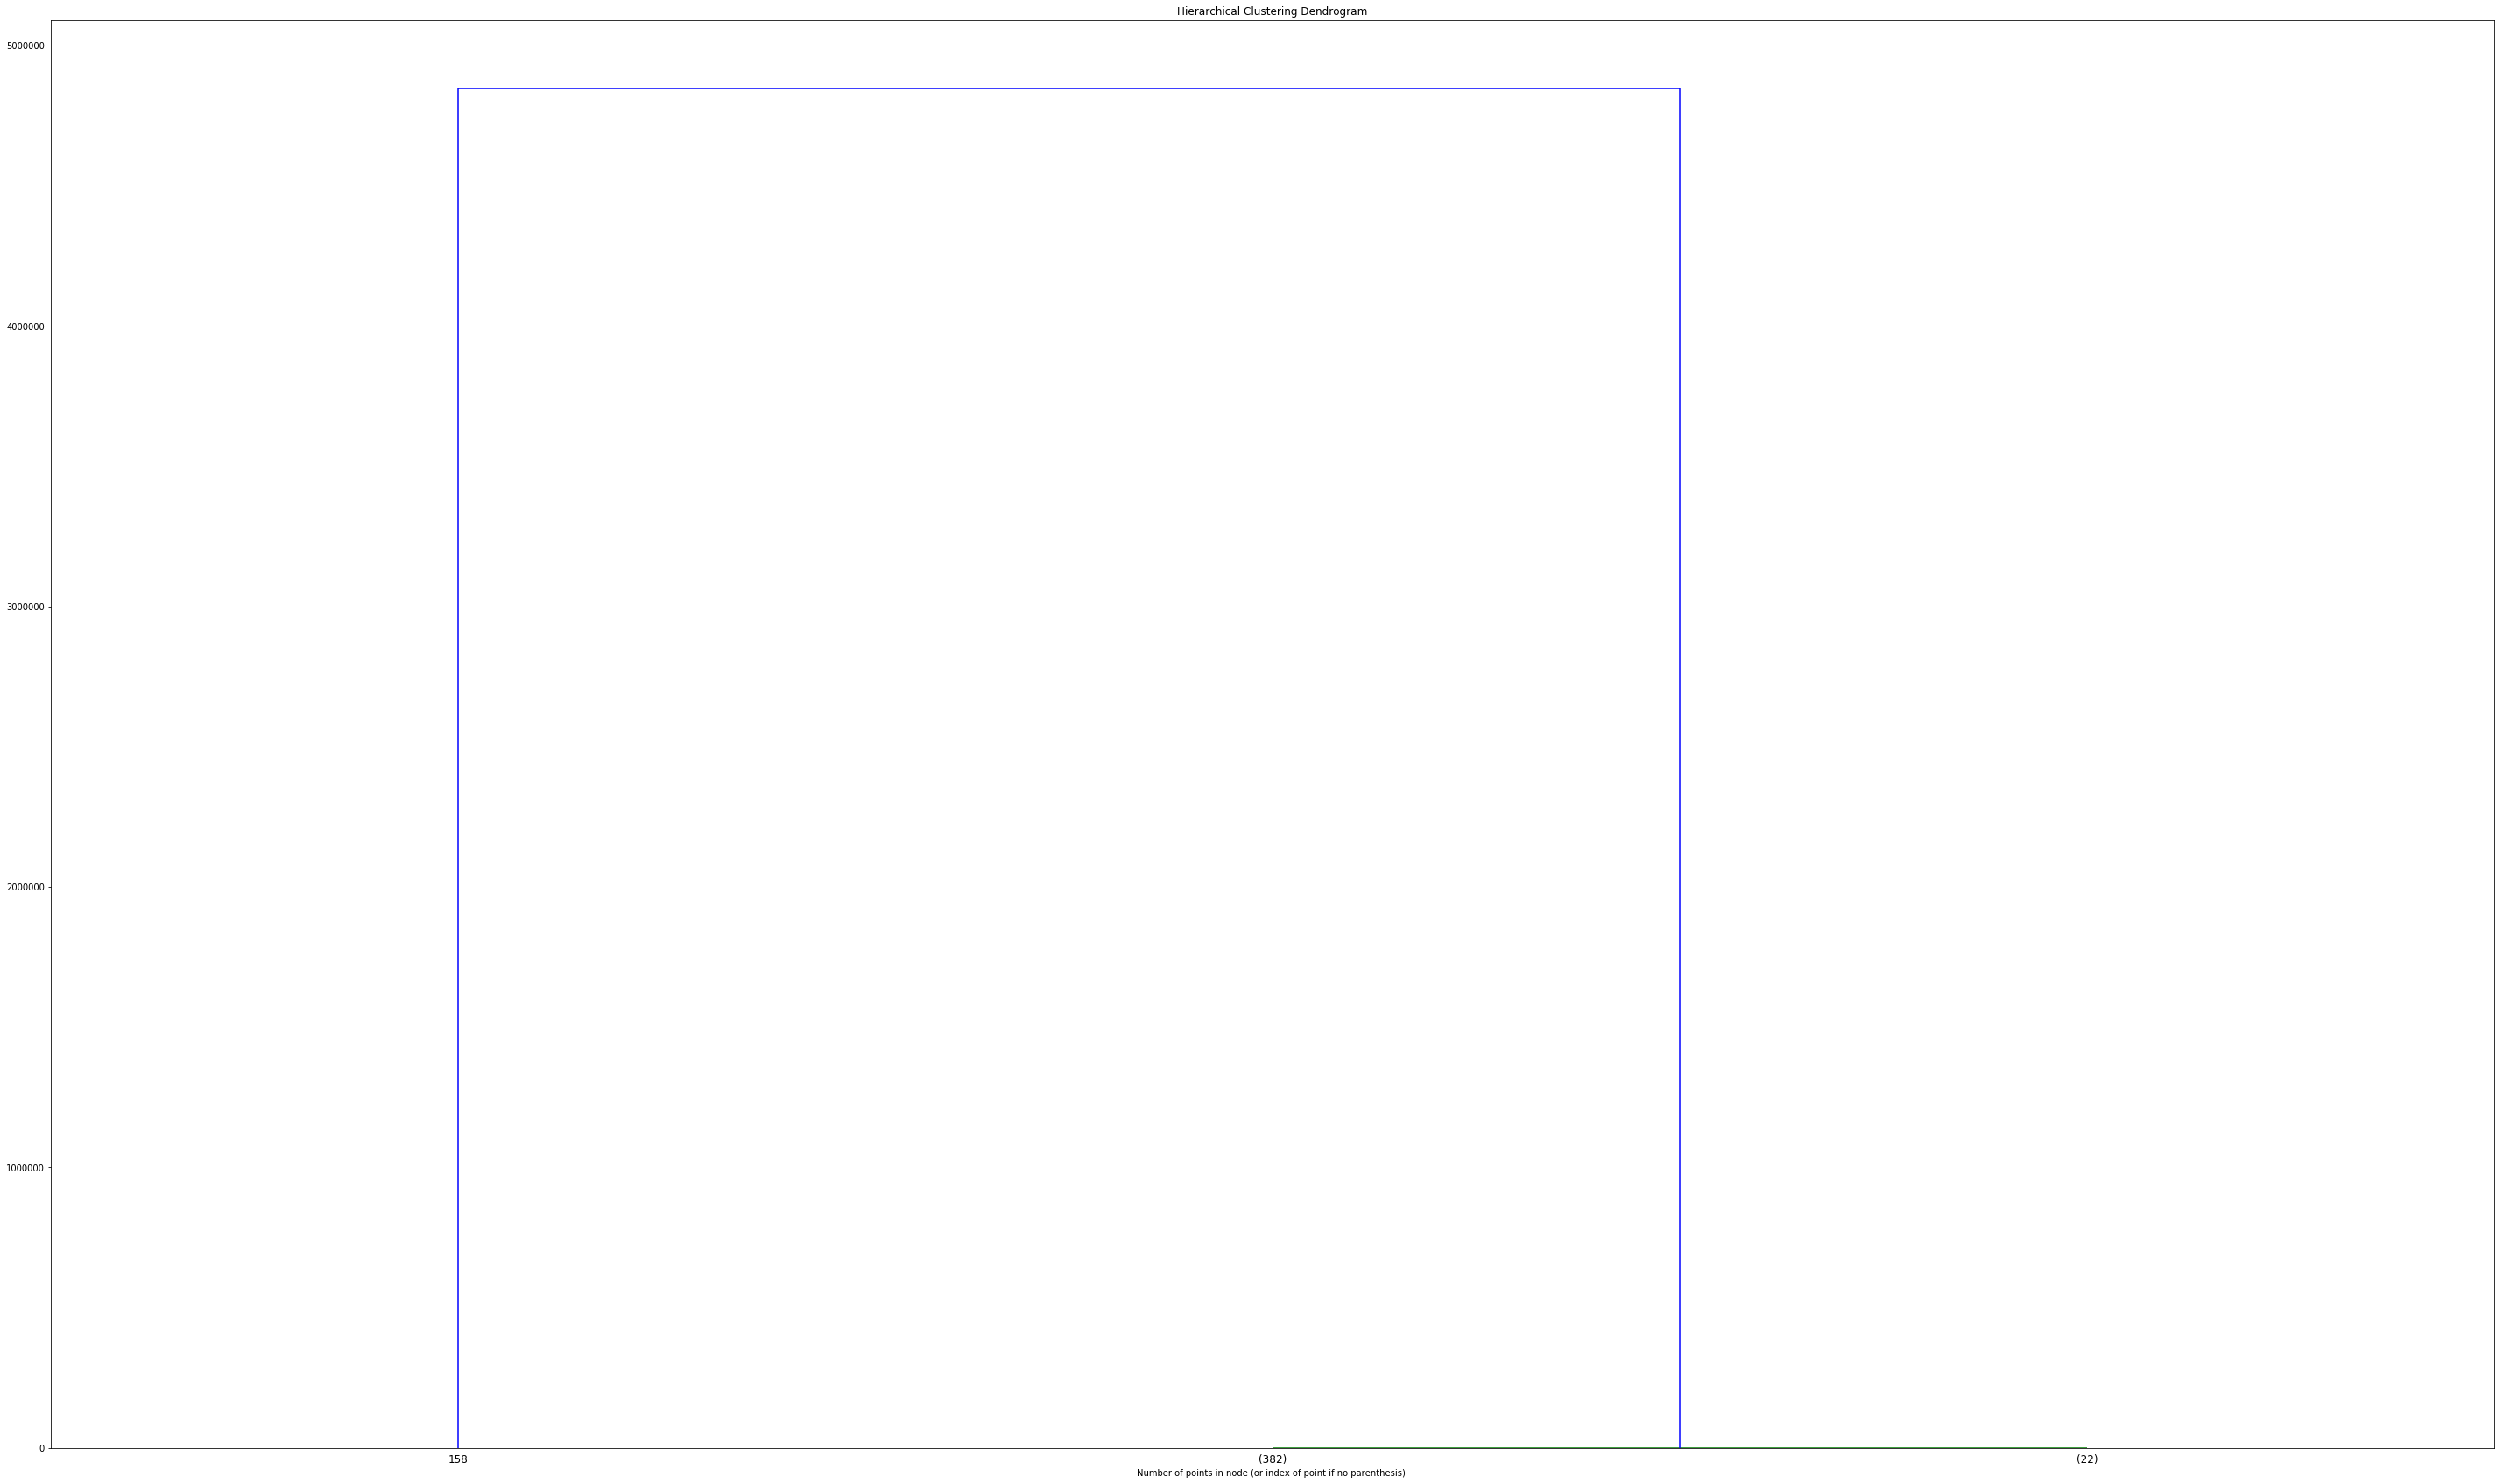

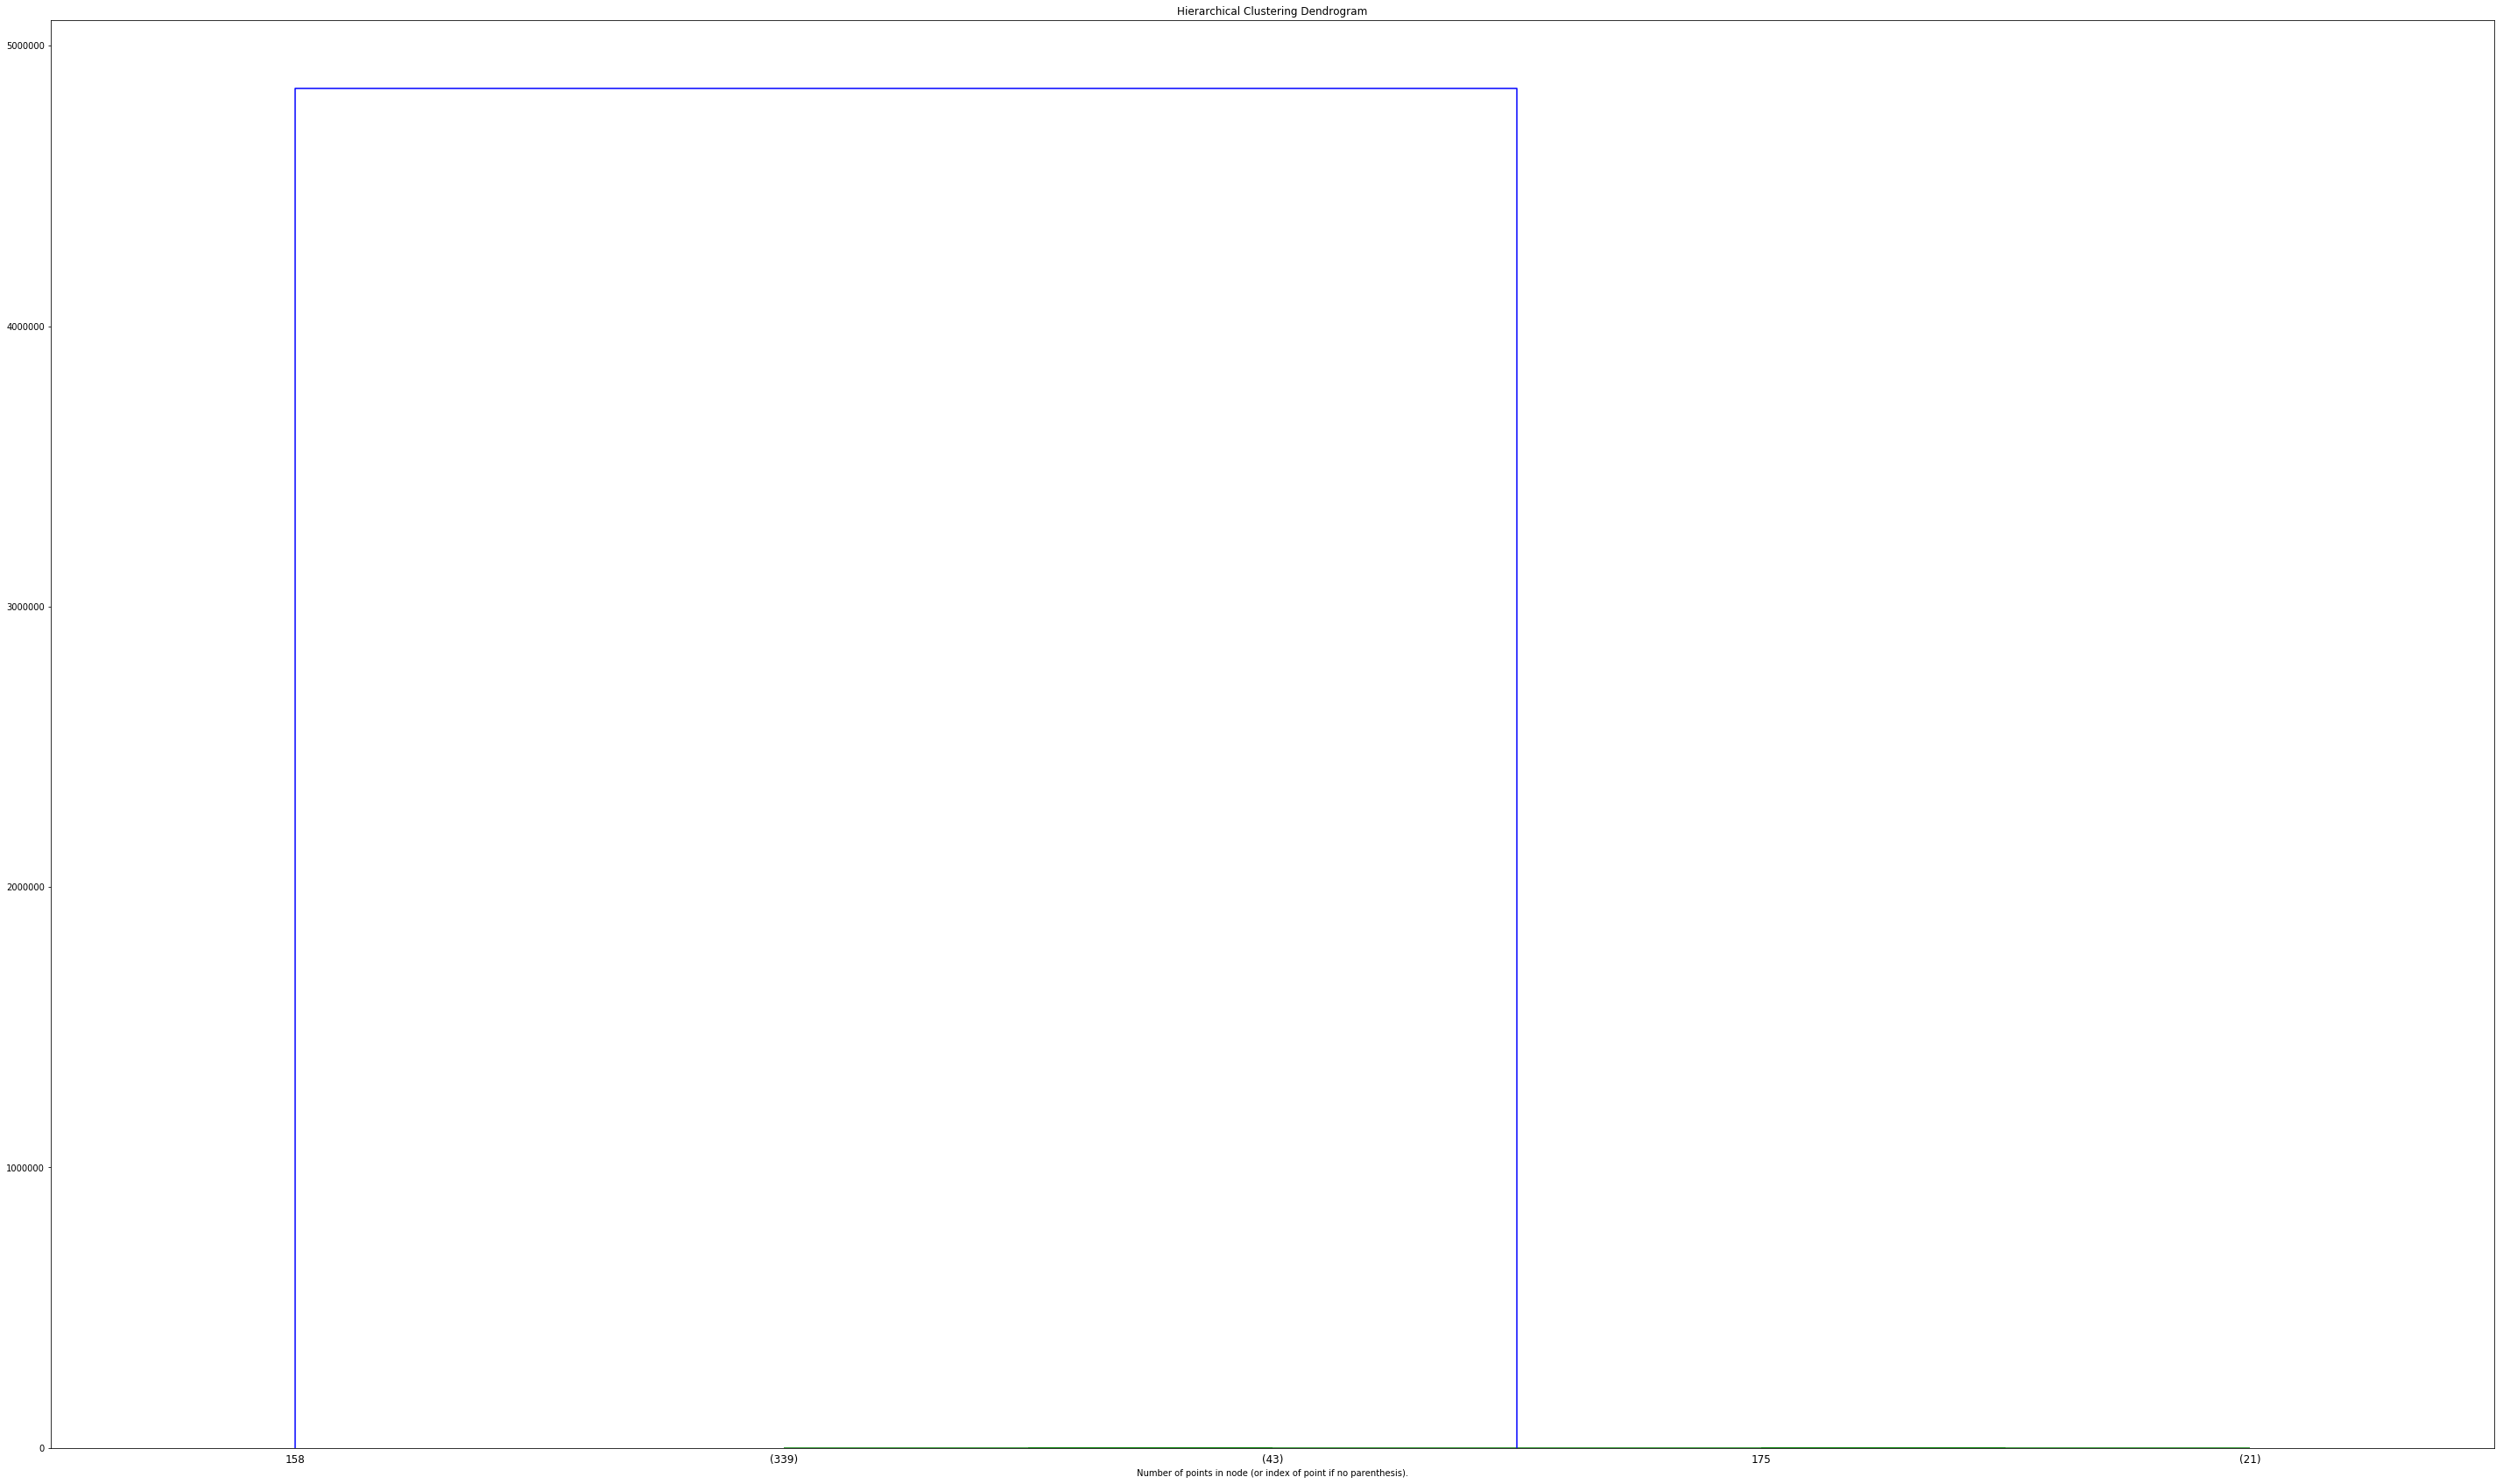

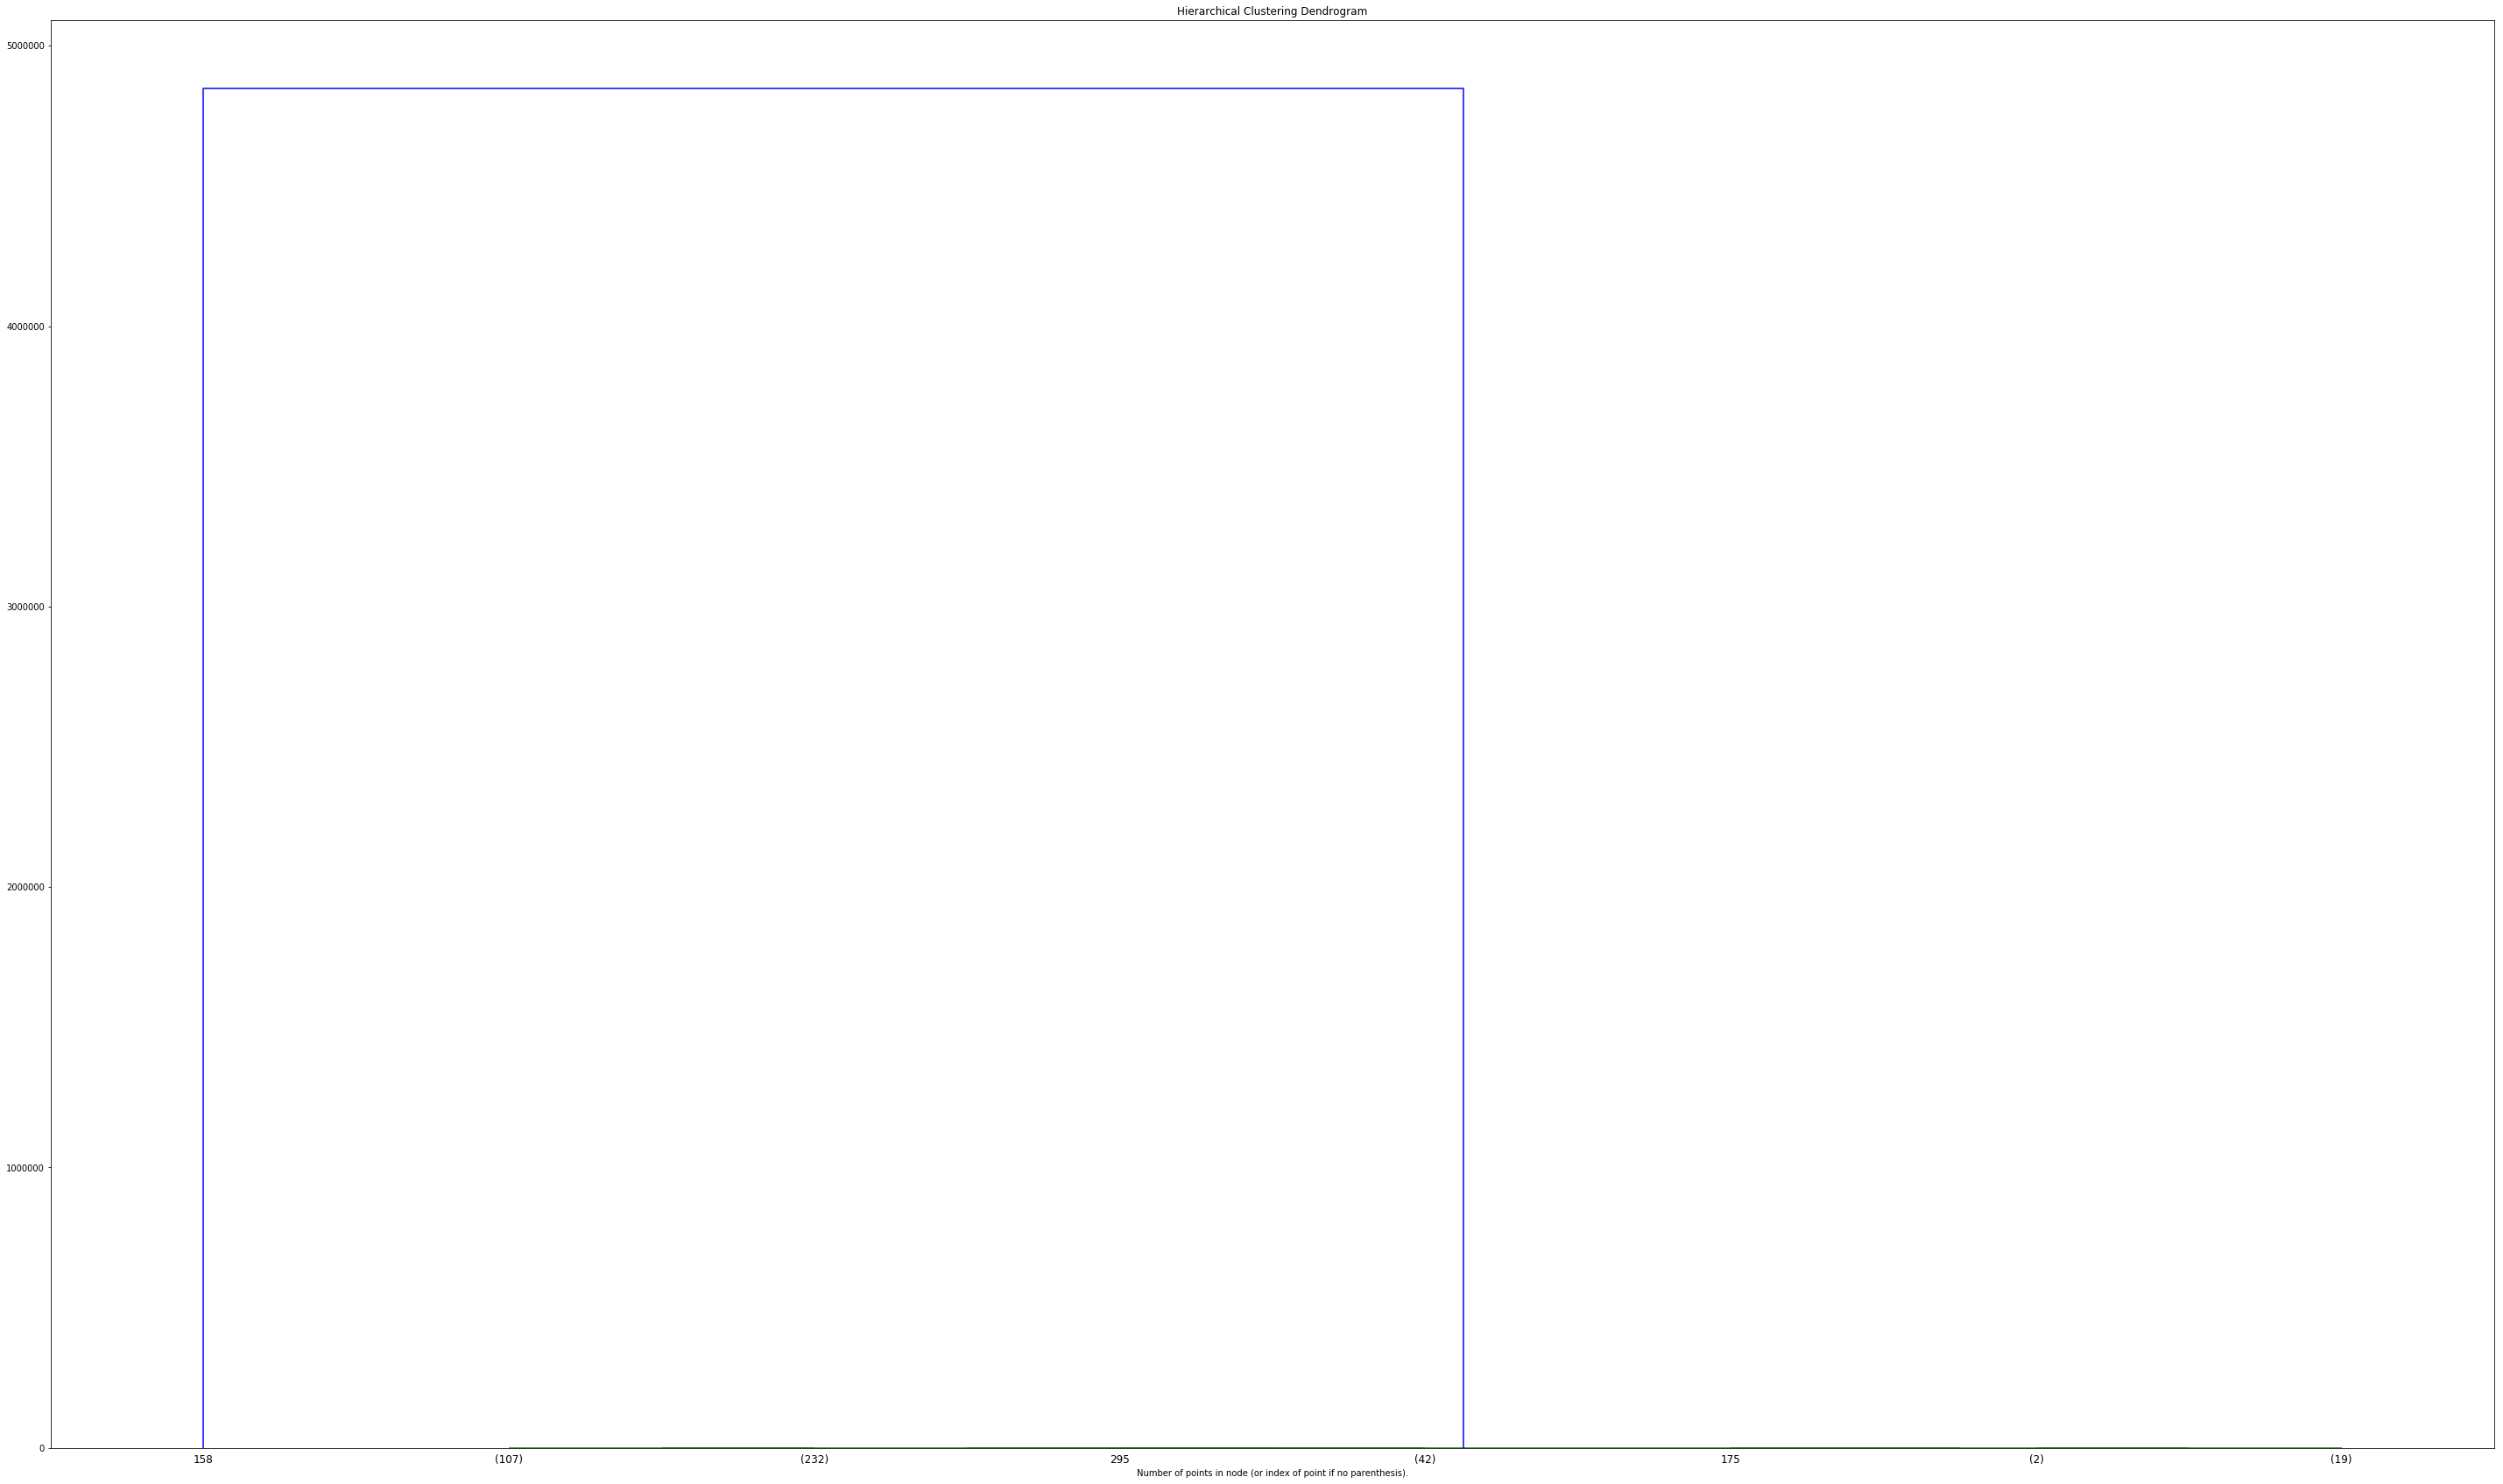

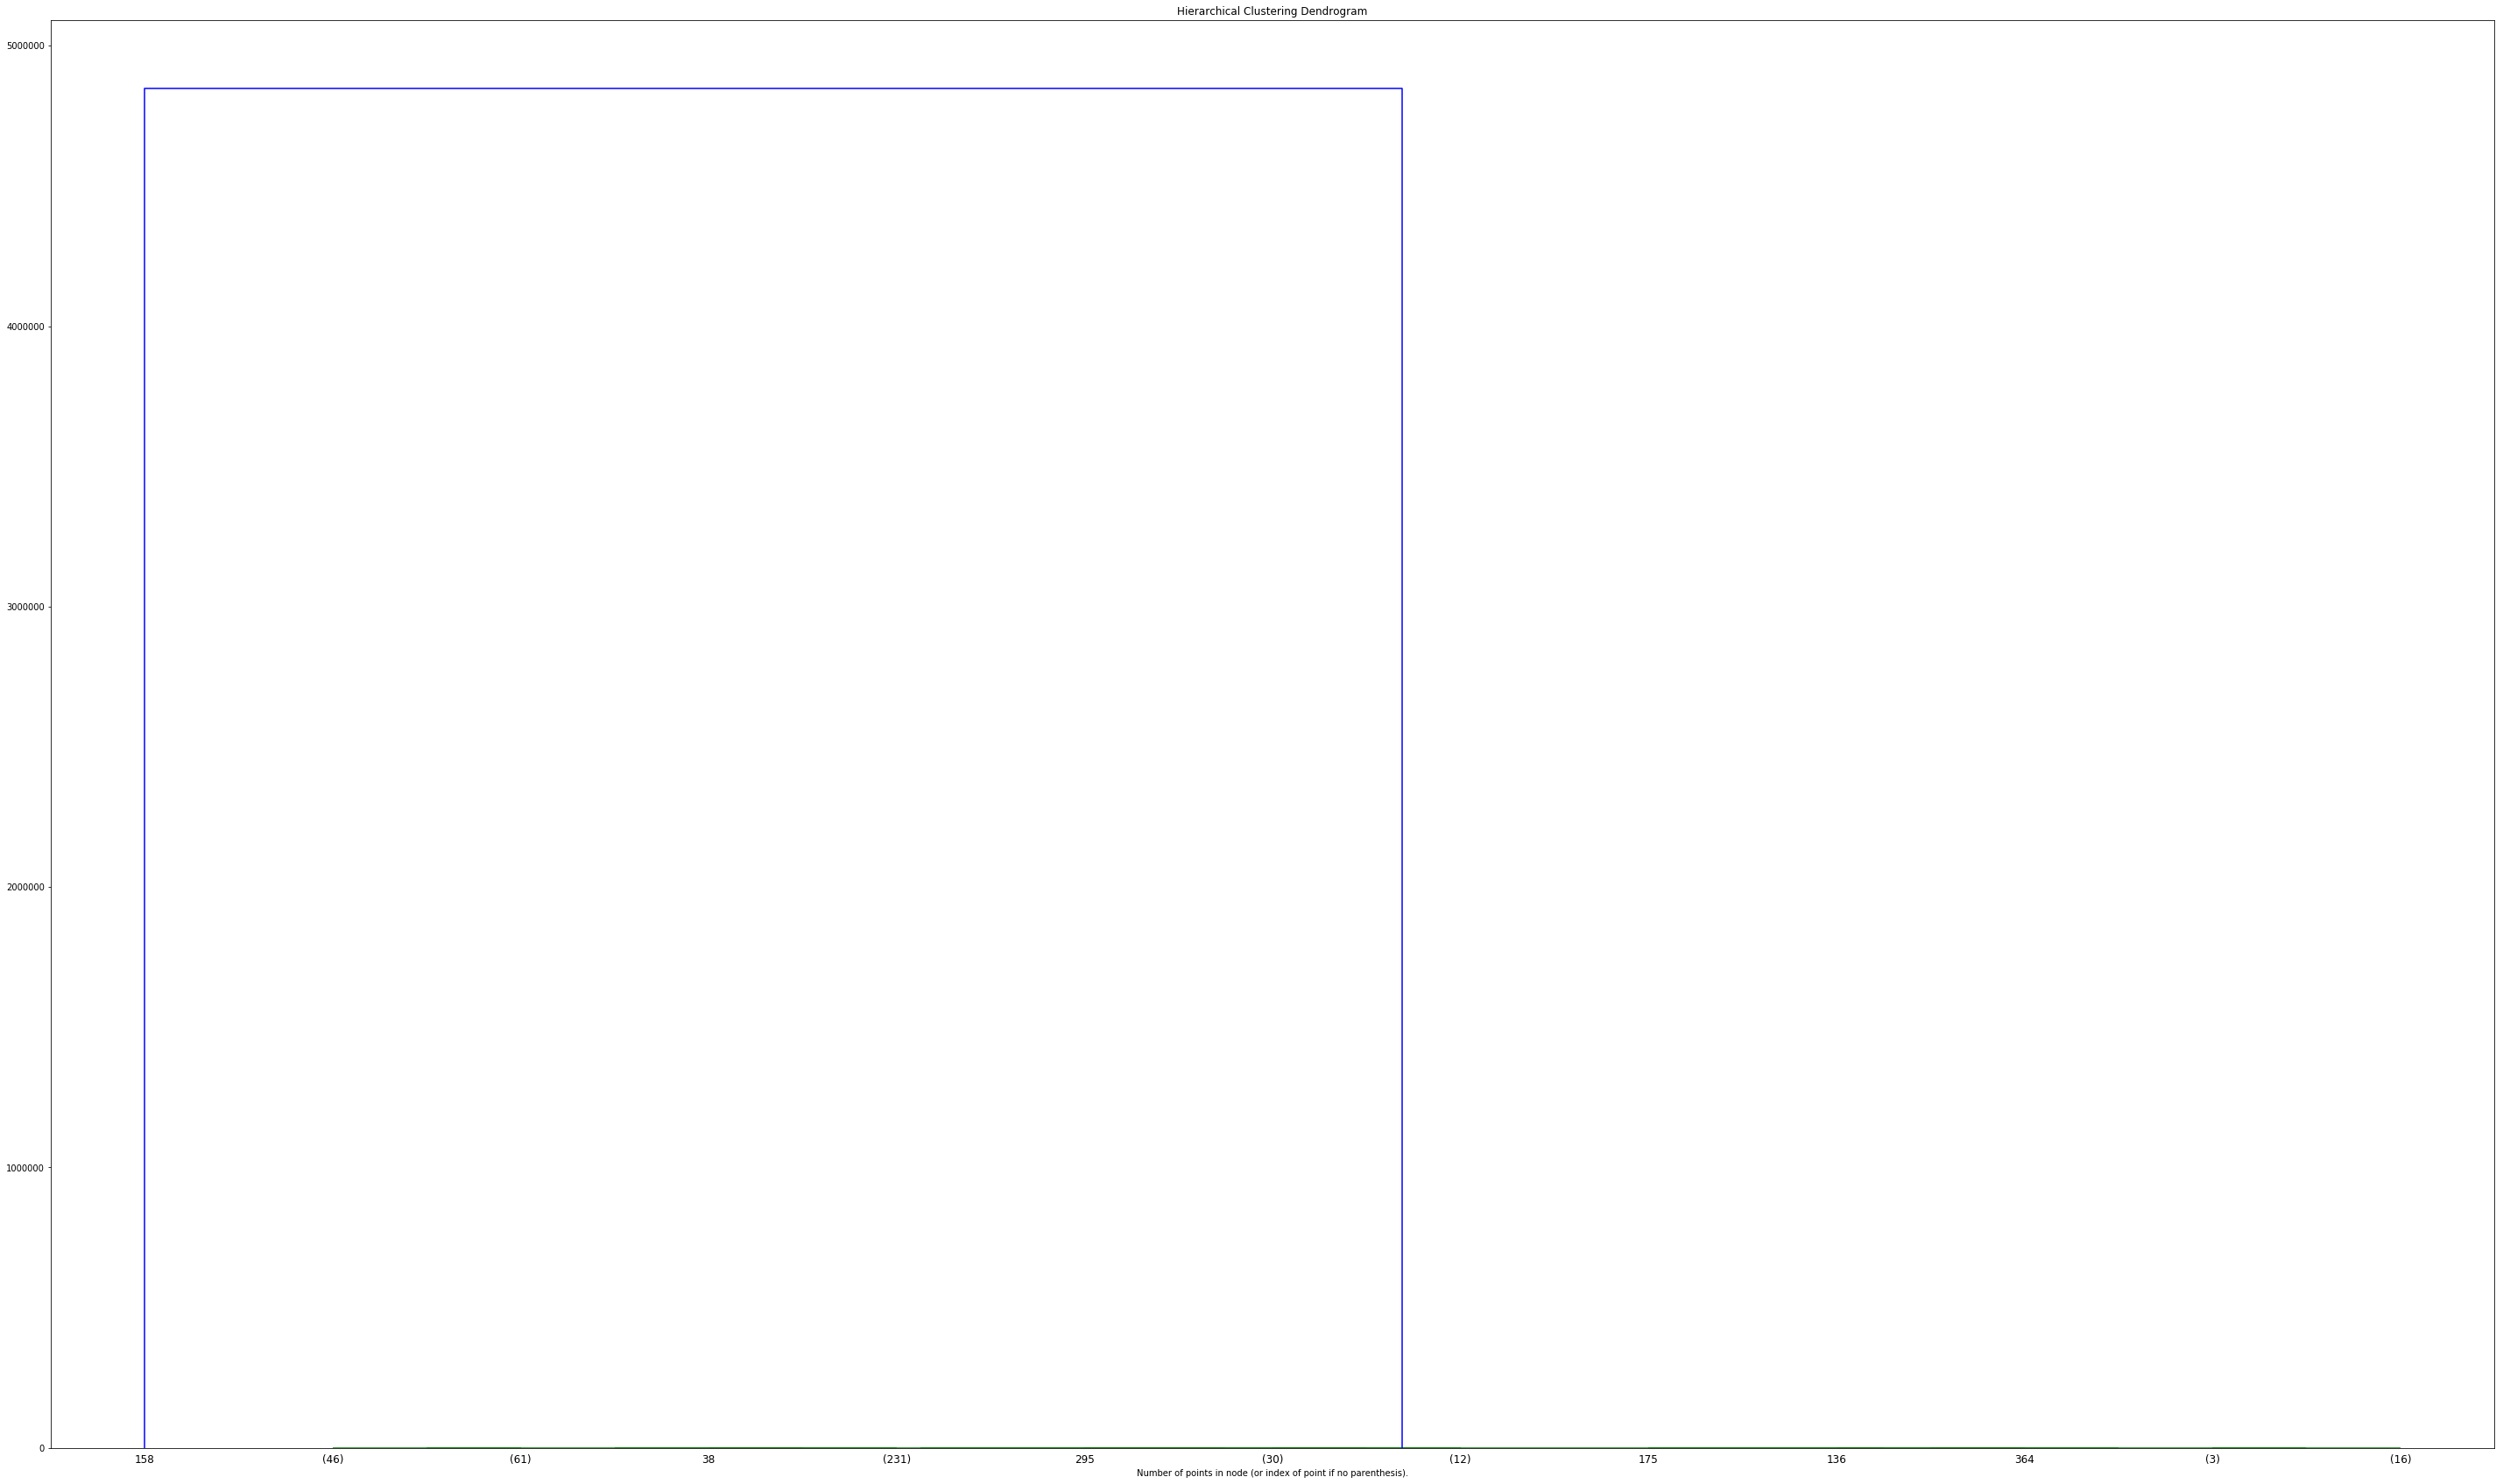

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

for i in range(5):
    
    plt.figure(figsize=(50,30))
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    u = plot_dendrogram(model, truncate_mode='level', p=i)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.savefig('..\\reports\\figures\\dendrogram' + str(i) + '.png', dpi=100)
    plt.show()

# Визуализация кластеров TSNE

- https://distill.pub/2016/misread-tsne/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

In [ ]:
def create_viz(transf_X, N, labels, i):
    tsne = TSNE(random_state=17, perplexity=50, n_iter=5000)
    X_embedded = tsne.fit_transform(transf_X)
    palette = sns.color_palette("bright", N)
    plt.figure(figsize=(10,10))
    plt.title('TSNE')
    sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels, palette=palette)
    plt.savefig('..\\reports\\figures\\tsne_' + str(i) + '.png', dpi=100)
    plt.show()

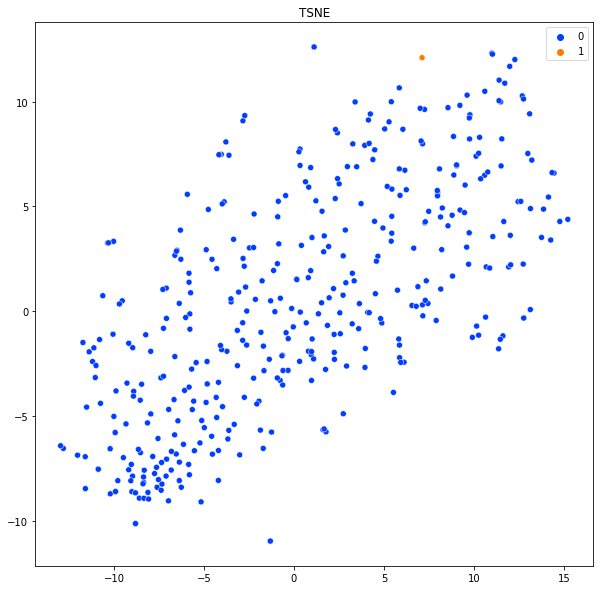

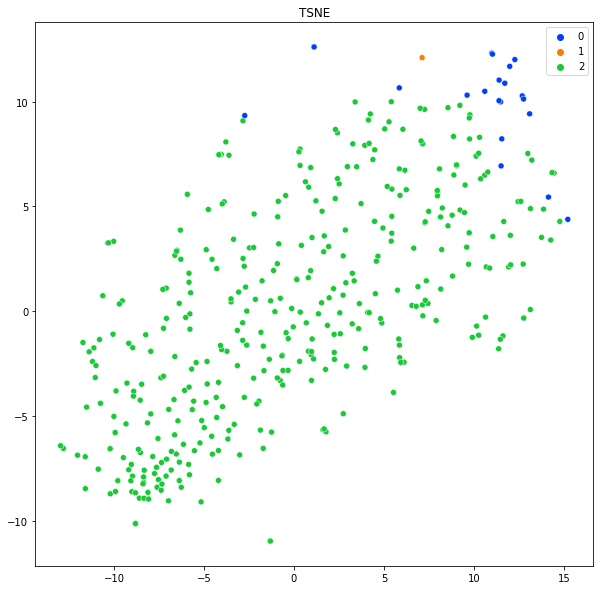

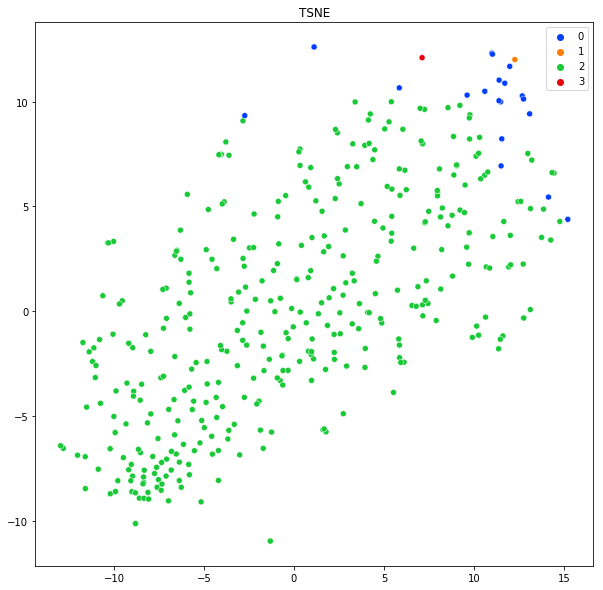

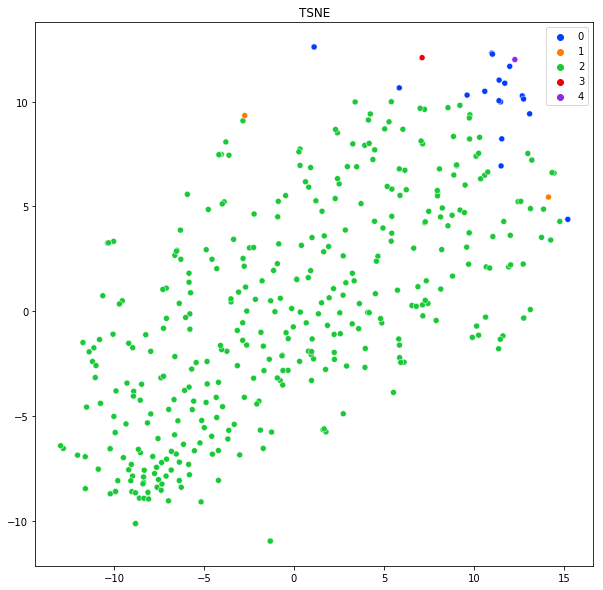

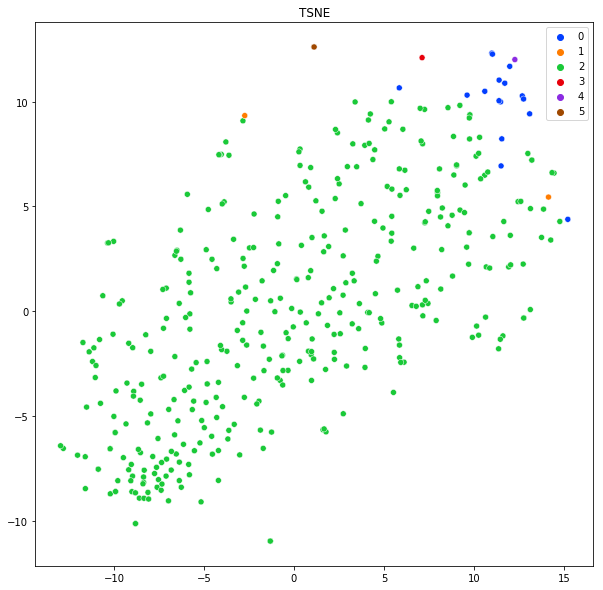

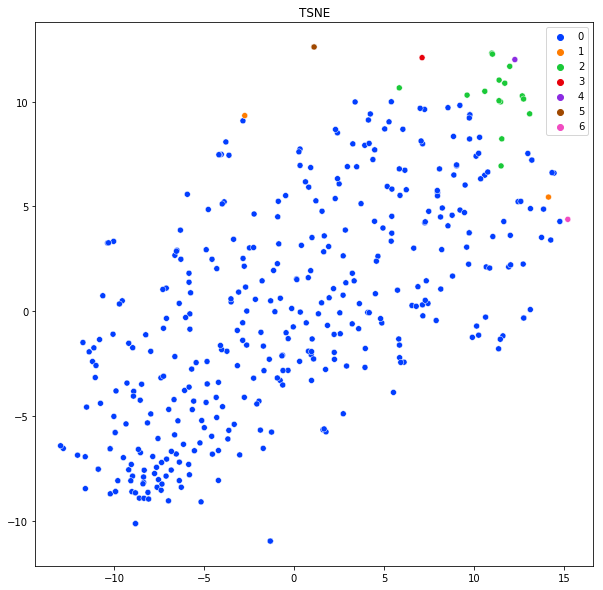

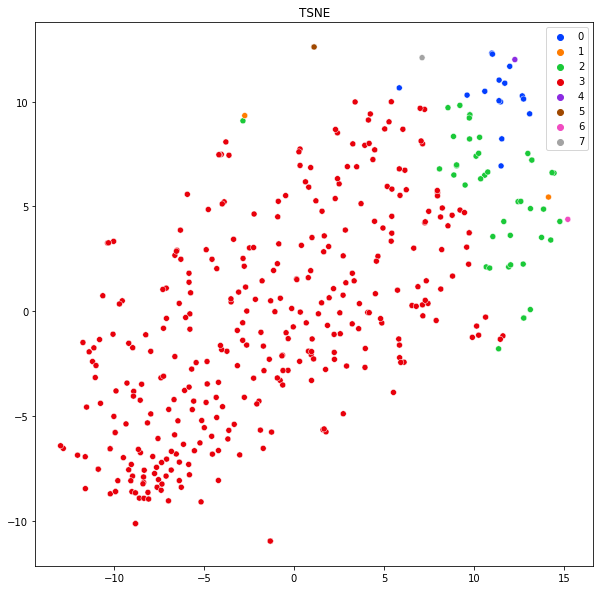

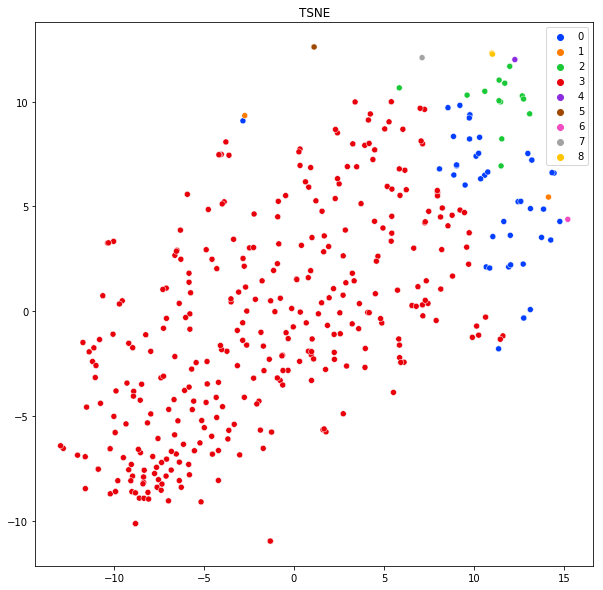

In [ ]:
for i in range(2,14):
    model = AgglomerativeClustering(n_clusters=i)
    model = model.fit(X)
    create_viz(X, i, model.labels_, i)

In [ ]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

for i in range(2,14):
    model = AgglomerativeClustering(n_clusters=i)
    model = model.fit(X)
    
    colors = sns.color_palette("bright", i)

    df = pd.DataFrame({'x': x, 'y':y, 'label':model.labels_}) 
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(10, 10)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=colors[name],mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

    ax.legend()
    plt.savefig('..\\reports\\figures\\pca_' + str(i) + '.png', dpi=100)
    plt.show()

# Метрики качества кластеризации

## Silhouette Coefficient
The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [ ]:
metrics.silhouette_score(X, labels, metric='euclidean')

## Calinski-Harabasz Index
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [ ]:
metrics.calinski_harabasz_score(X, labels)

## Davies-Bouldin Index
Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [ ]:
metrics.davies_bouldin_score(X, labels)

In [ ]:
n_clusters = 30
silhouette_score_list = []
calinski_harabasz_score_list = []
davies_bouldin_score_list = []
for i in range(2,n_clusters):
    clustering = AgglomerativeClustering(n_clusters=i,
                                     affinity='euclidean', 
                                     memory=None, 
                                     connectivity=None, 
                                     compute_full_tree='auto', 
                                     linkage='ward', 
                                     distance_threshold=None).fit(X)
    labels = clustering.labels_
    
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    calinski_harabasz_score = metrics.calinski_harabasz_score(X, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(X, labels)
    
    silhouette_score_list.append(silhouette_score)
    calinski_harabasz_score_list.append(calinski_harabasz_score)
    davies_bouldin_score_list.append(davies_bouldin_score)

In [ ]:
# The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
plt.figure(figsize=(10,5))
plt.plot(silhouette_score_list, 'bx-')
plt.title('silhouette_score')
plt.savefig('..\\reports\\figures\\silhouette_score.png', dpi=100)

In [ ]:
# The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster
plt.figure(figsize=(10,5))
plt.plot(calinski_harabasz_score_list, 'bx-')

In [ ]:
# Zero is the lowest possible score. Values closer to zero indicate a better partition.
plt.figure(figsize=(10,5))
plt.plot(davies_bouldin_score_list, 'bx-')
plt.title('davies_bouldin_score')
plt.savefig('..\\reports\\figures\\davies_bouldin_score.png', dpi=100)